In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
path = r'C:\Users\Ben\Desktop\Career Foundry Tasks\Board Game Analysis'

In [4]:
df = pd.read_csv(os.path.join(path,'items_wrangled.csv'), index_col = False)

In [8]:
df_top = pd.read_csv(os.path.join(path,'board_game_wrangled.csv'), index_col = False)

In [8]:
df.columns

Index(['name', 'game_id', 'rating', 'complexity_rating', 'year_published',
       'min_players', 'max_players', 'min_play_time', 'max_play_time',
       'min_age', 'owned_by', 'top_2000'],
      dtype='object')

In [9]:
sub = df[['rating', 'complexity_rating', 'year_published',
       'min_players', 'max_players', 'min_play_time', 'max_play_time',
       'min_age', 'owned_by', 'top_2000']]

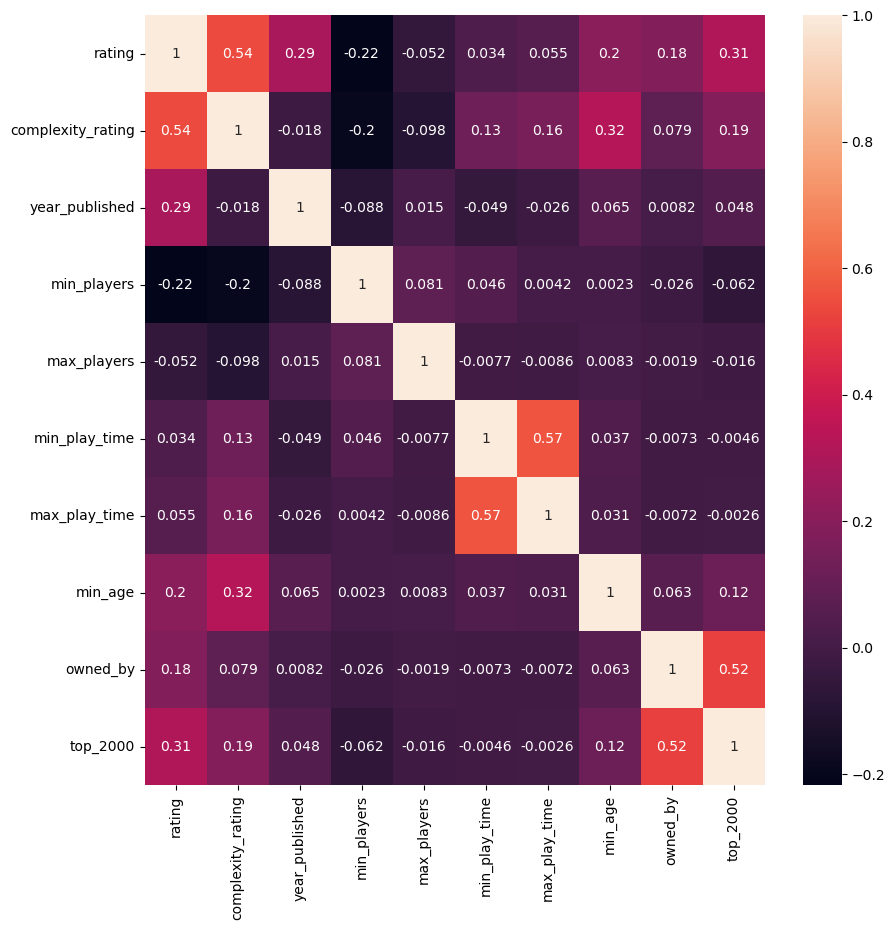

In [10]:
# Heat map of all board games
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

I'm most interested in the variables that affect rating. Complexity rating has the strongest correlation out of any other variable. I will look at the complexity rating closely in the heatmap for the top 2000 games as that data set has more information on those games.

In [11]:
df_top.columns

Index(['rank', 'bgg_url', 'game_id', 'name', 'min_players', 'max_players',
       'min_time', 'max_time', 'complexity_rating', 'year', 'age',
       'avg_rating', 'geek_rating', 'num_votes', 'owned', 'designer',
       'top_10_themes', 'total_themes', 'abstract_games', 'childrens_games',
       'customizable_games', 'family_games', 'party_games', 'strategy_games',
       'thematic_games', 'war_games'],
      dtype='object')

In [12]:
subtop = df_top[['rank', 'min_players', 'max_players',
       'min_time', 'max_time', 'complexity_rating', 'year', 'age',
       'avg_rating', 'num_votes', 'owned',
       'top_10_themes', 'total_themes', 'abstract_games', 'childrens_games',
       'customizable_games', 'family_games', 'party_games', 'strategy_games',
       'thematic_games', 'war_games']]

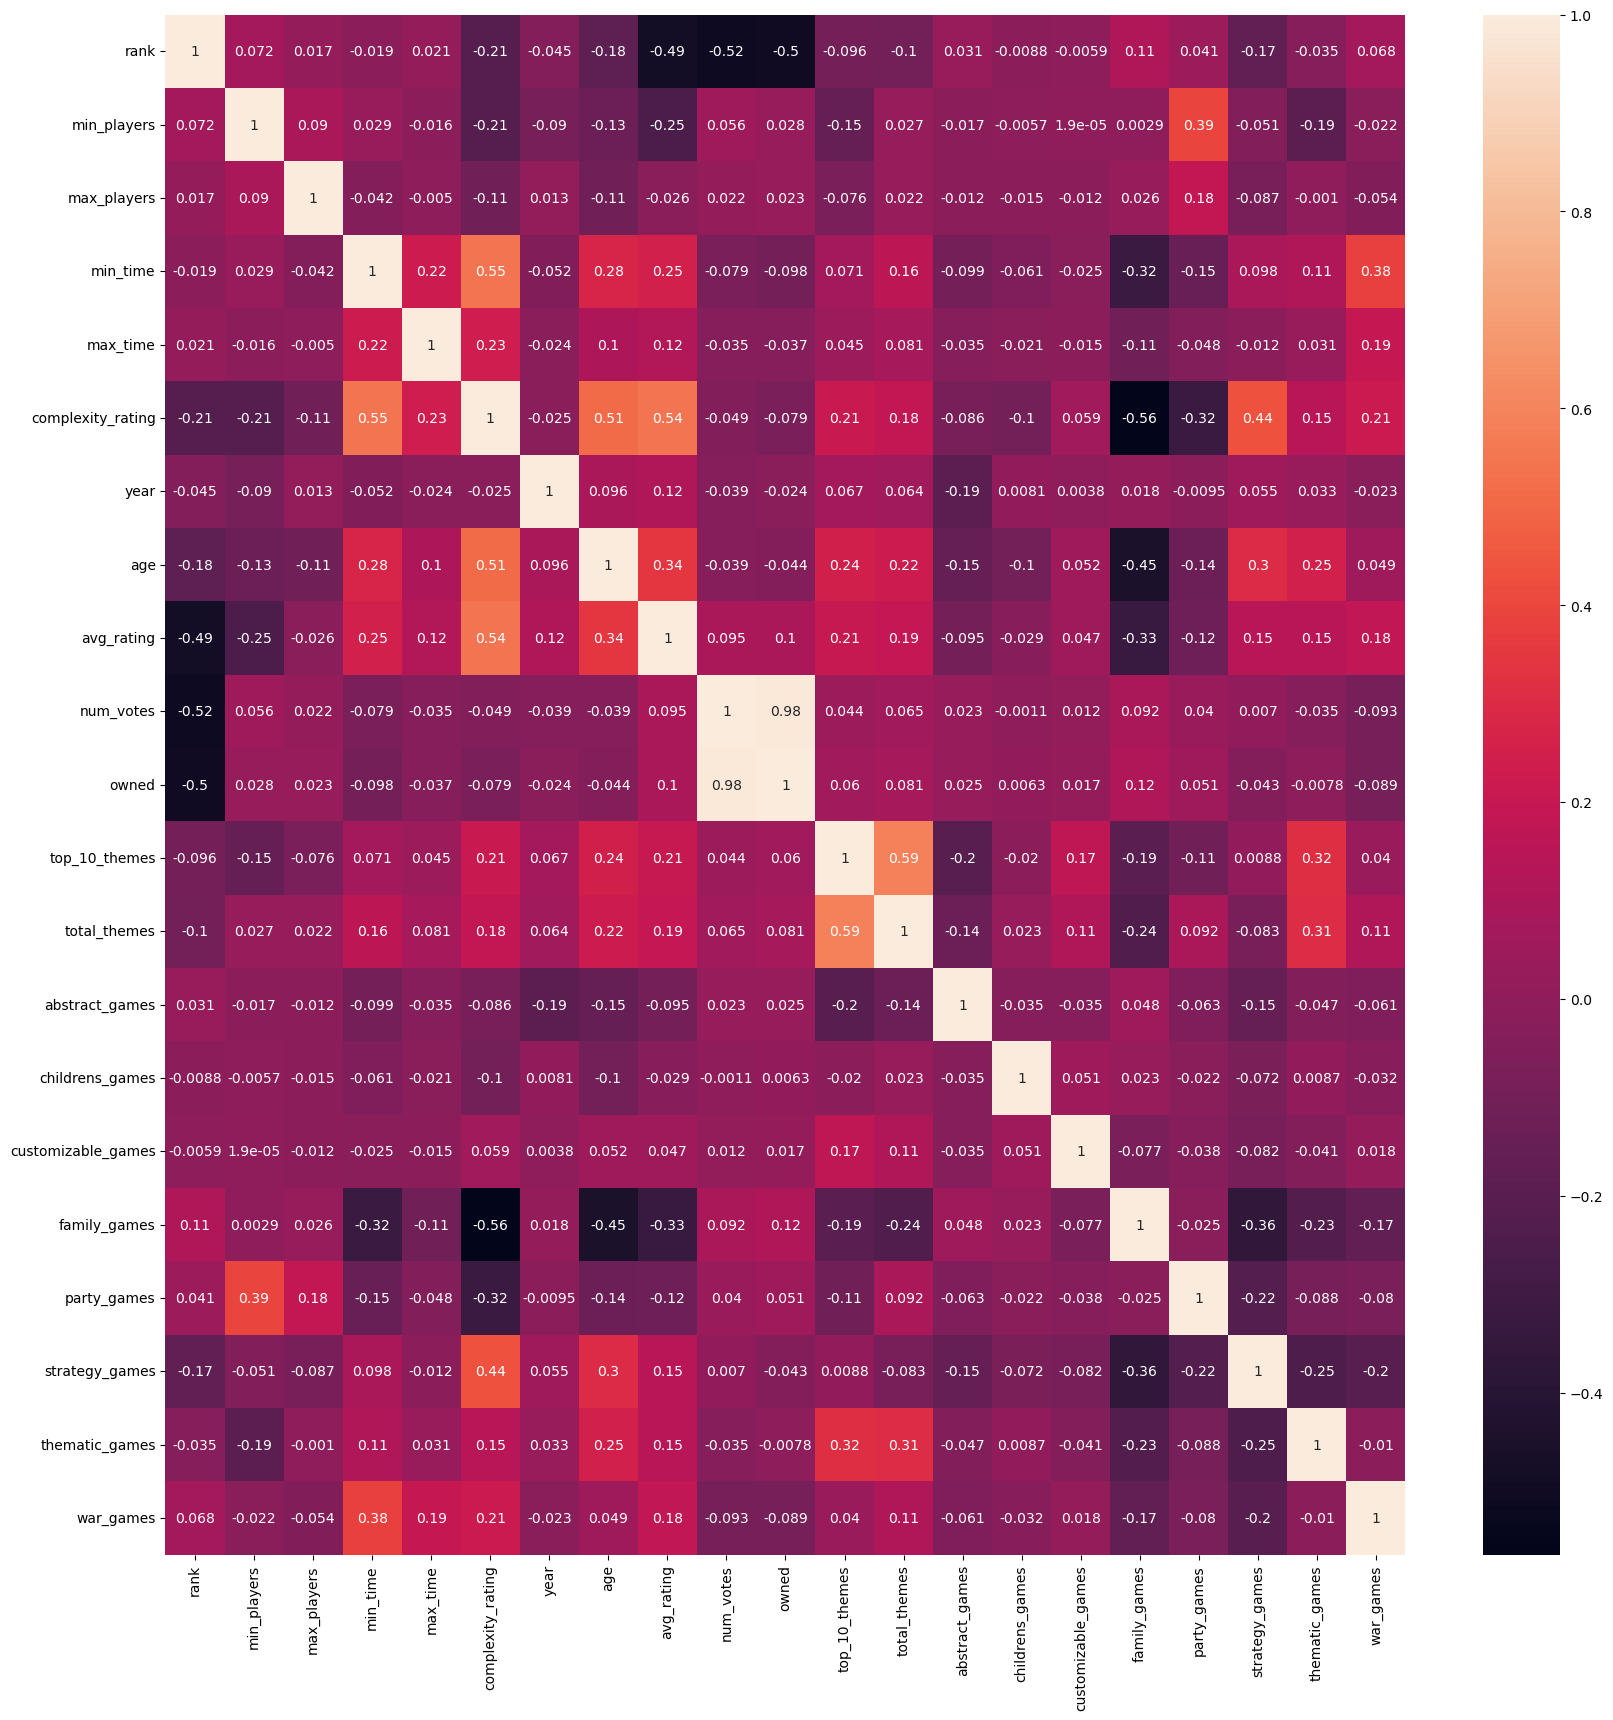

In [14]:
# Heat map of top 2000 games
f,ax = plt.subplots(figsize=(20,20))
corr = sns.heatmap(subtop.corr(), annot = True, ax = ax)

I'm most interested in complexity rating to get an idea of which types of games will rate the highest. Complexity rating had the strongest correlation from the previous heat map. There is a positive correlation between complexity rating and min_time, age, avg_rating, and strategy_games and there is a negative correlation between complexity_rating and family_games and party_games.

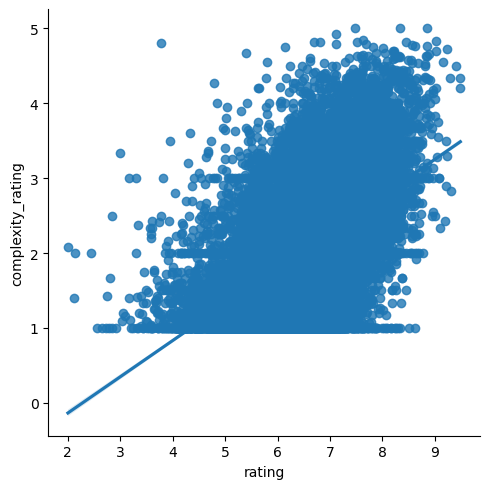

In [15]:
sns.lmplot(x = 'rating', y = 'complexity_rating', data = df)

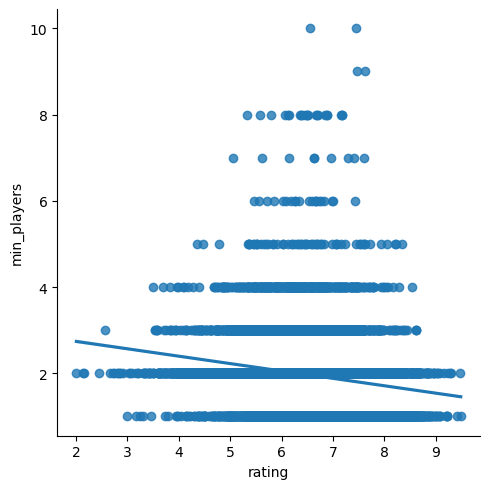

In [18]:
sns.lmplot(x = 'rating', y = 'min_players', data = df)

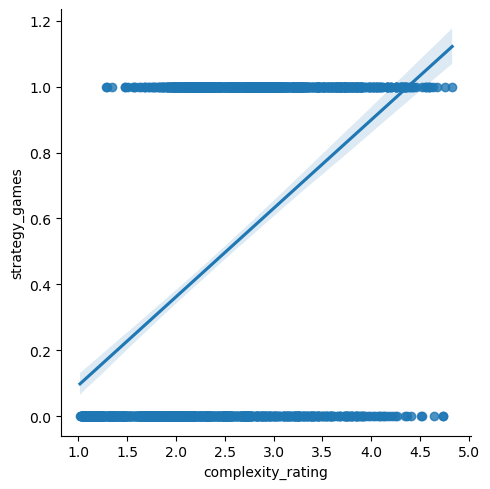

In [20]:
sns.lmplot(x = 'complexity_rating', y = 'strategy_games', data = df_top)

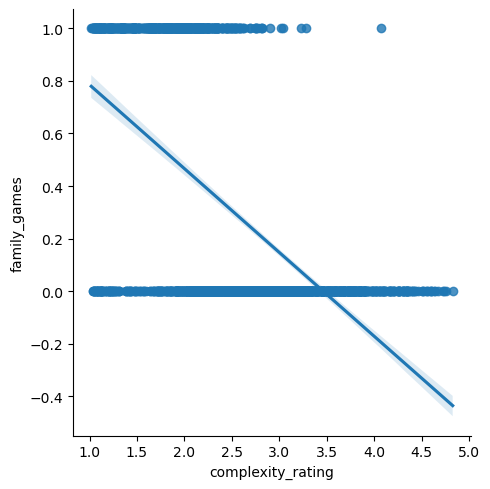

In [24]:
sns.lmplot(x = 'complexity_rating', y = 'family_games', data = df_top)

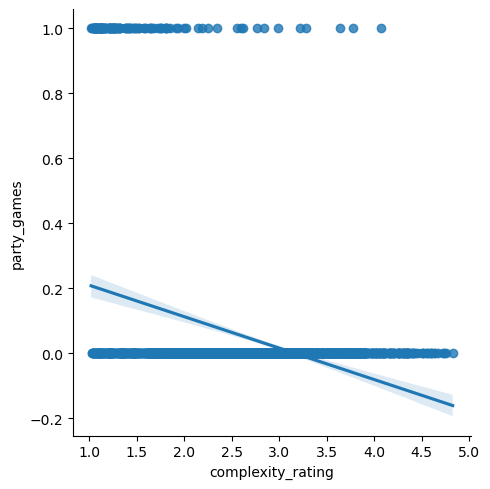

In [25]:
sns.lmplot(x = 'complexity_rating', y = 'party_games', data = df_top)

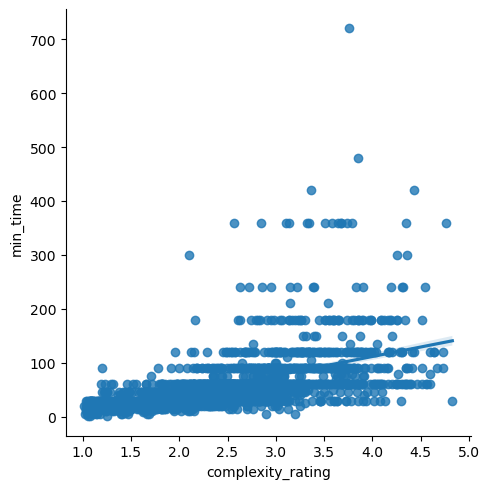

In [21]:
sns.lmplot(x = 'complexity_rating', y = 'min_time', data = df_top)

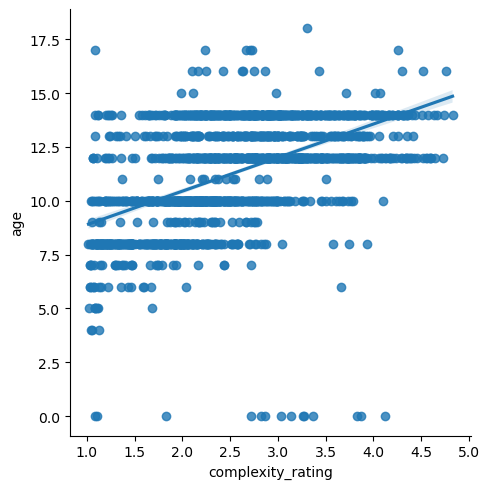

In [22]:
sns.lmplot(x = 'complexity_rating', y = 'age', data = df_top)

In [26]:
sub_2 = sub[['rating', 'complexity_rating', 'year_published']]

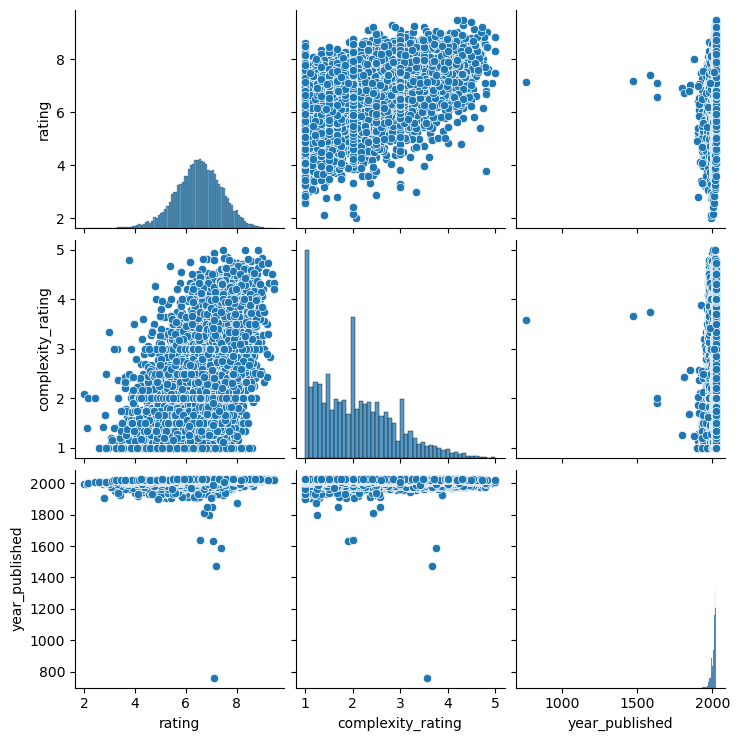

In [27]:
g = sns.pairplot(sub_2)

In [30]:
subtop_2 = subtop[['rank', 'min_players',
       'min_time', 'complexity_rating', 'age',
       'avg_rating', 'family_games', 'party_games', 'strategy_games']]

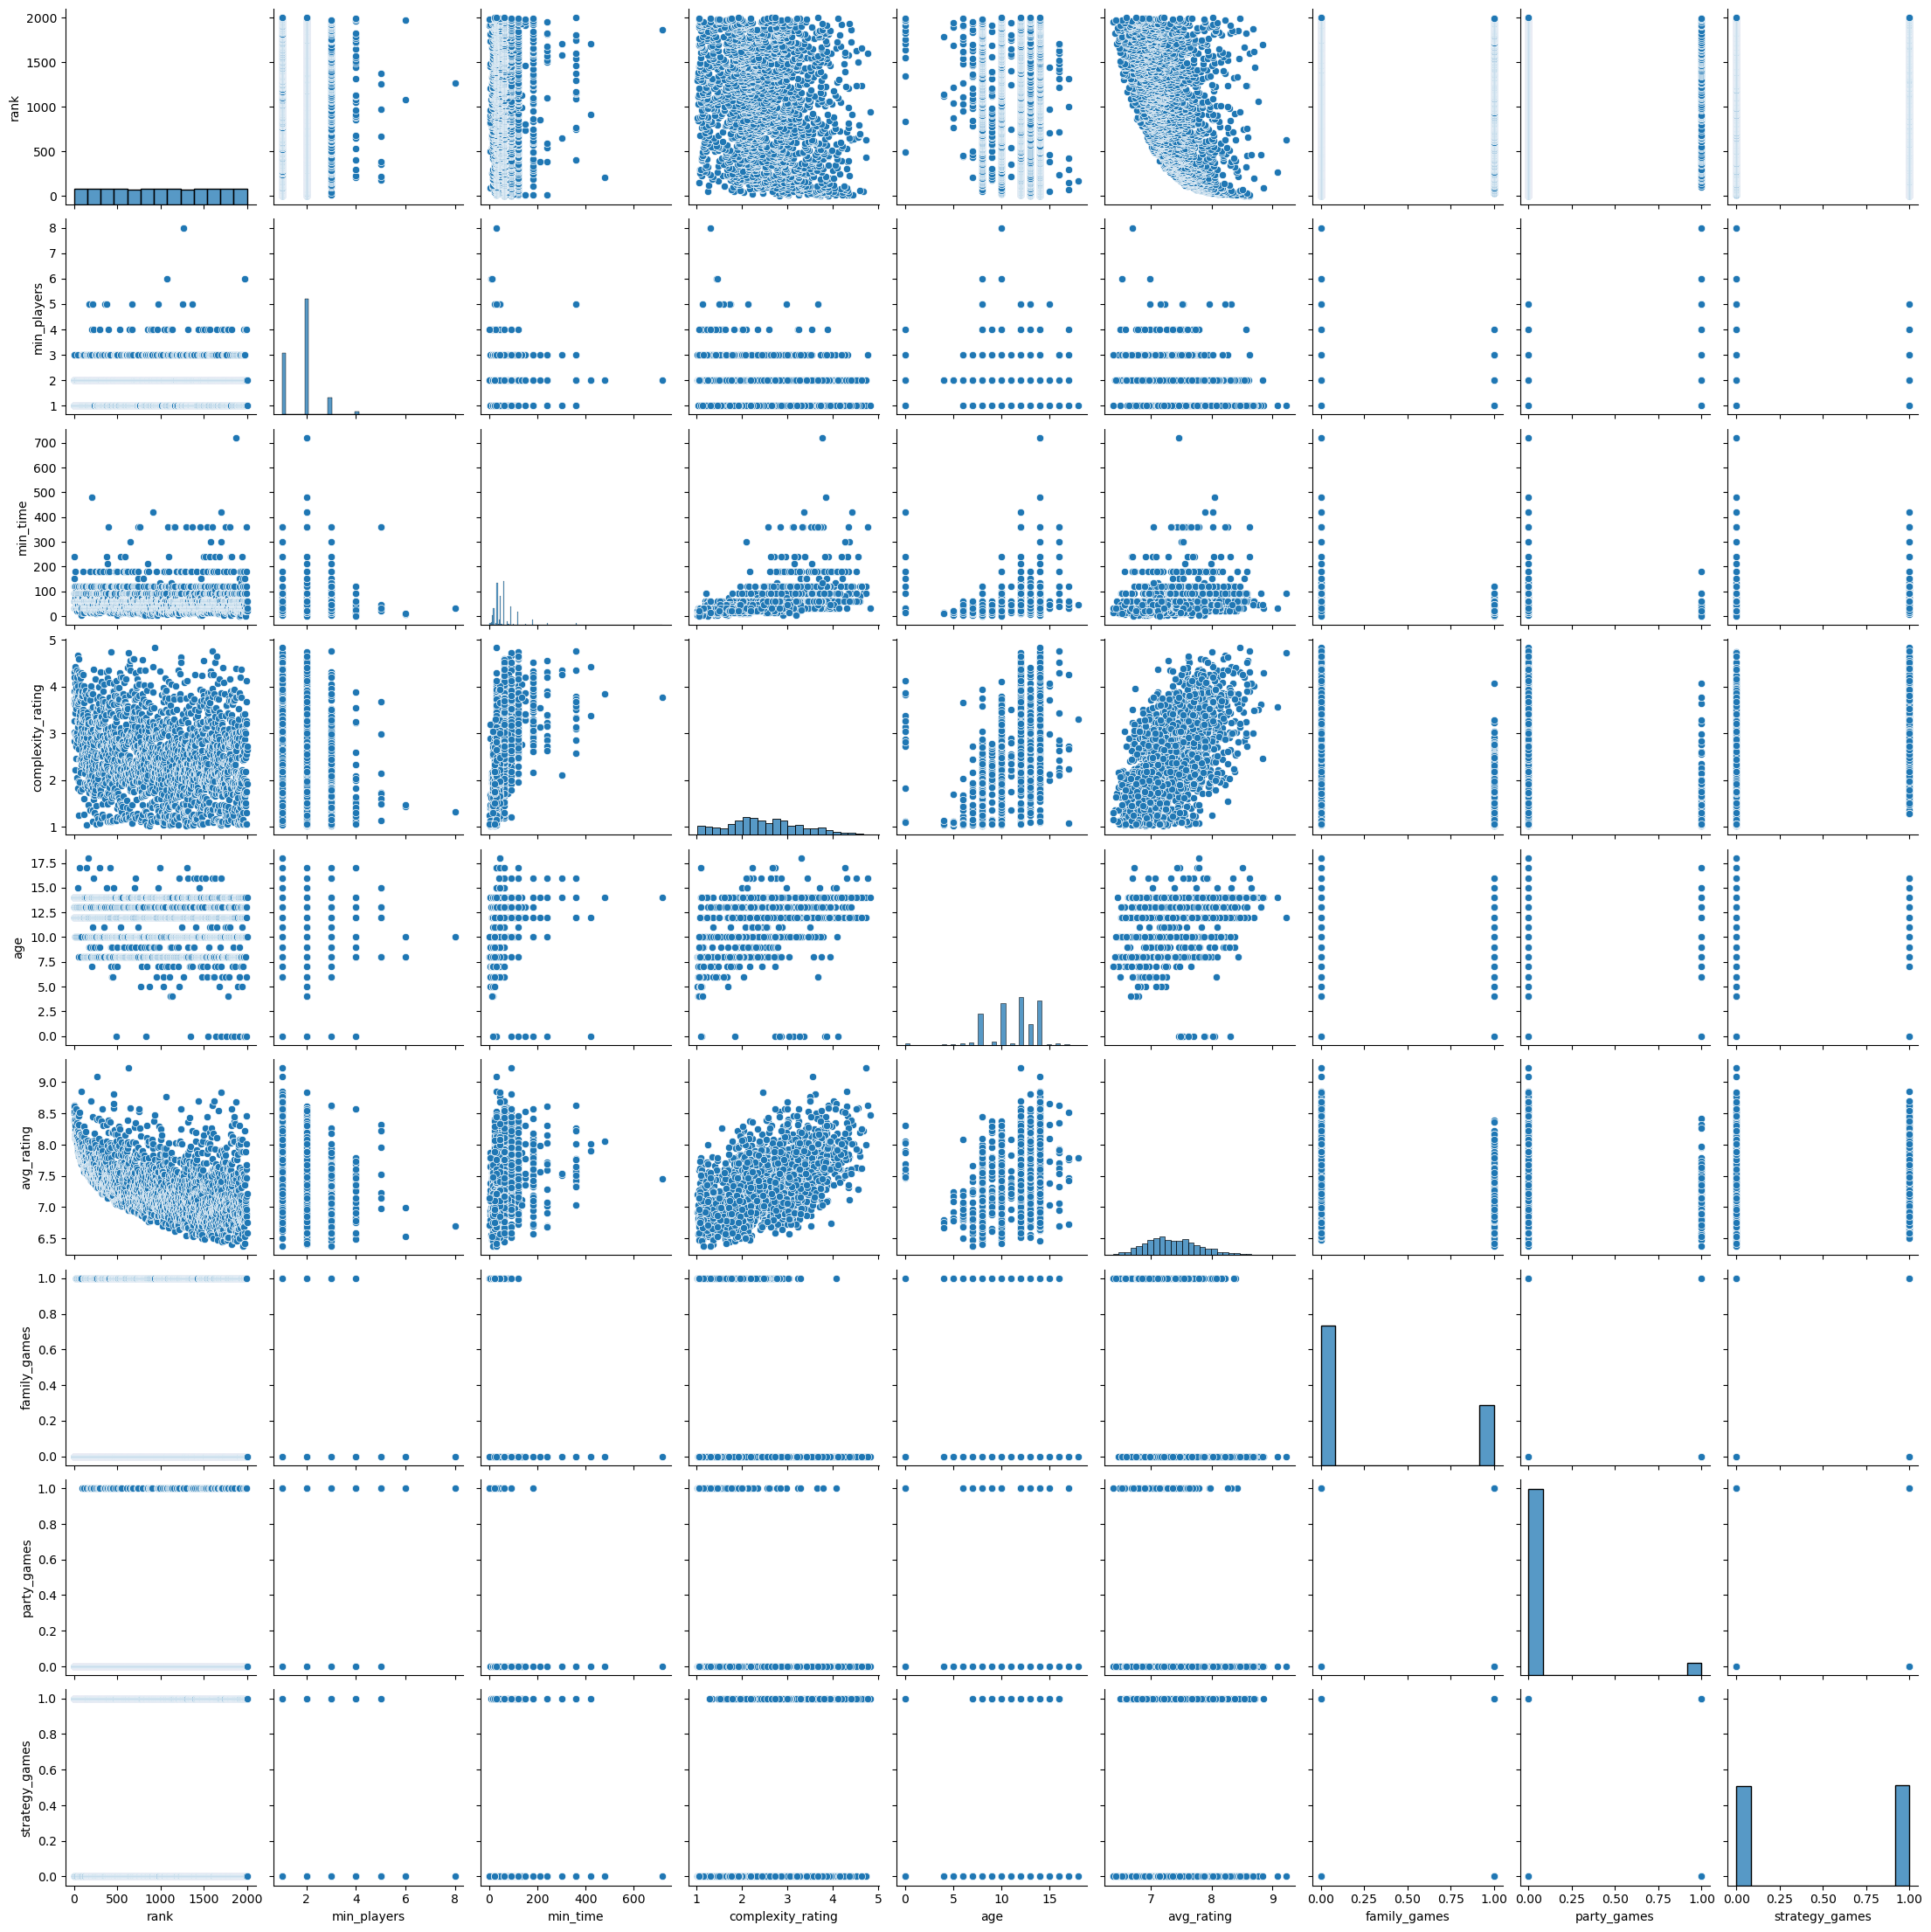

In [31]:
g = sns.pairplot(subtop_2)

The variables I'd like to look more into will first be complexity_rating as it appears to have the strongest correlation to rating. It looks like complextiy_rating has correlations with minimum players, minimum time, and age. The strongest correlation for types of games are family games, party games, and strategy games.

<AxesSubplot:xlabel='complexity_rating', ylabel='Count'>

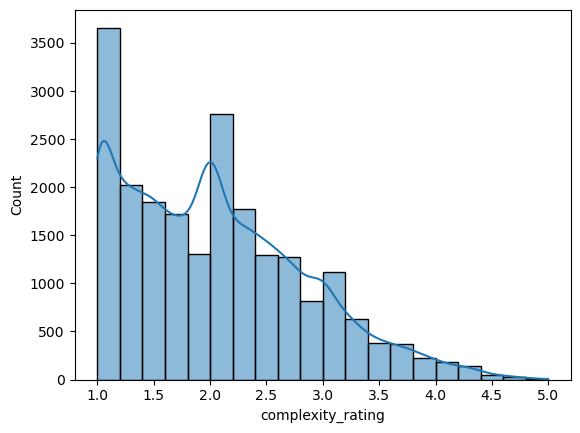

In [32]:
sns.histplot(df['complexity_rating'], bins = 20, kde = True)

In [33]:
df.loc[df['complexity_rating'] < 2, 'complexity_category'] = 'Low complexity'

In [34]:
df.loc[(df['complexity_rating'] >= 2) & (df['complexity_rating'] < 3), 'complexity_category'] = 'Average complexity'

In [35]:
df.loc[df['complexity_rating'] >= 3, 'complexity_category'] = 'High complexity'

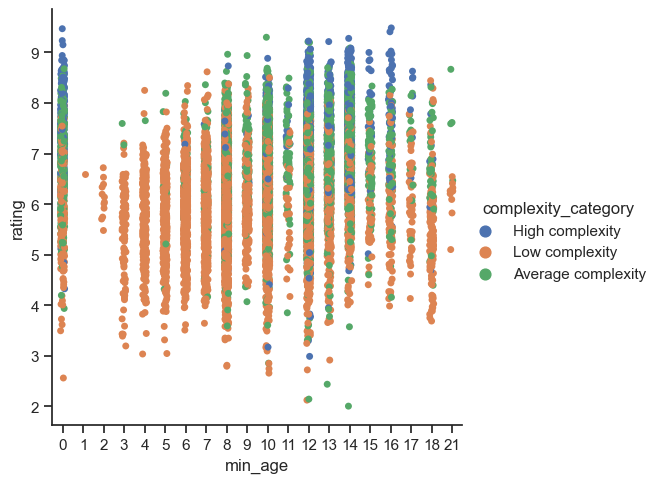

In [38]:
# All games
sns.set(style="ticks")
g = sns.catplot(x="min_age", y="rating", hue="complexity_category", data=df)

<AxesSubplot:xlabel='complexity_rating', ylabel='Count'>

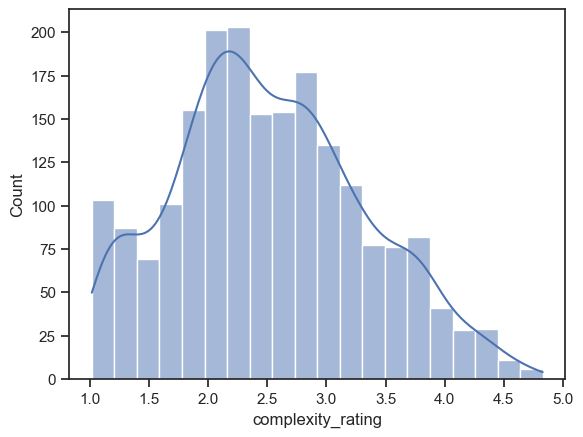

In [39]:
sns.histplot(df_top['complexity_rating'], bins = 20, kde = True)

In [10]:
df_top.loc[df_top['complexity_rating'] < 2, 'complexity_category'] = 'Low complexity'

In [11]:
df_top.loc[(df_top['complexity_rating'] >= 2) & (df_top['complexity_rating'] < 3), 'complexity_category'] = 'Average complexity'

In [12]:
df_top.loc[df_top['complexity_rating'] >= 3, 'complexity_category'] = 'High complexity'

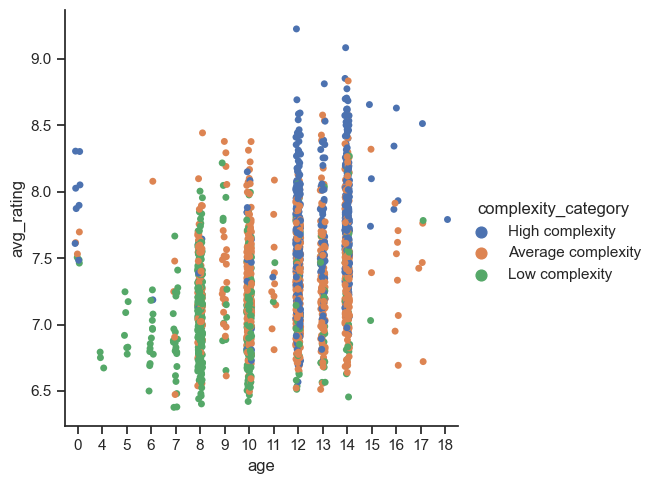

In [47]:
# Top 2000 games
sns.set(style="ticks")
g = sns.catplot(x="age", y="avg_rating", hue="complexity_category", data=df_top)

In [14]:
sns.set(style="ticks")
g = sns.catplot(x="rank", y="avg_rating", hue="complexity_category", data=df_top)

KeyboardInterrupt: 

In [6]:
df.columns

Index(['name', 'game_id', 'rating', 'complexity_rating', 'year_published',
       'min_players', 'max_players', 'min_play_time', 'max_play_time',
       'min_age', 'owned_by', 'top_2000'],
      dtype='object')

Categorical plots show that the lower the age, the lower the complexity of games. Lower complexity games have a lower recommended minimum age. High complexity games have a higher average rating with higher recommended minimum age. This correlation is even more prominent with the top 2000 games.

Questions from previous task:
•	Which types of board games are most popular? Strategy games have a small correlation to being the most popular type of game.
•	Is there a correlation between game details such as play time, player count, or complexity rating that affect overall rankings? The highest correlation is complexity rating.
•	What are the most common types of board games? Analysis looked into correlation of variables so this question still remains to be answered.

It looks like strategy games are the most popular types of games and are the most complex games. I'd like to see the count of games and see if strategy games as a whole is more popular, or if there are just fewer strategy games.

It seems like family and party games don't rank well so they seem like bad games to introduce to the market, but there could still be demand for the games even if they don't generally rank well.